In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report

In [5]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/drive/MyDrive/DS Data Sets/KNN/glass.csv')

In [9]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [17]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7])

In [19]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [21]:
x=df.iloc[:,0:9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=35)

In [27]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((143, 9), (71, 9), (143,), (71,))

In [28]:
# Train K-Neighbors Classifier without Hyper-parameter Tuning

In [30]:
k=np.sqrt(df.shape[0]/2)
k

10.344080432788601

In [32]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_train,y_train)

In [34]:
model.score(x_train,y_train)

0.7762237762237763

In [36]:
y_pred=model.predict(x_test)
y_pred

array([2, 6, 3, 1, 1, 2, 2, 1, 1, 5, 2, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 7,
       5, 7, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 3, 7, 1, 2, 1, 1, 1, 3, 2, 1,
       2, 3, 6, 1, 1, 2, 1, 1, 1, 5, 2, 2, 5, 1, 3, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1])

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.72      0.68        25
           2       0.81      0.76      0.79        29
           3       0.29      0.50      0.36         4
           5       1.00      0.67      0.80         6
           6       1.00      0.67      0.80         3
           7       1.00      0.75      0.86         4

    accuracy                           0.72        71
   macro avg       0.79      0.68      0.71        71
weighted avg       0.76      0.72      0.73        71



In [39]:
# With Hyper-parameteer Tuning

In [41]:
# Use GridsearchCV
kncc=KNeighborsClassifier()
param_grid=dict(n_neighbors=range(1,3))

In [43]:
model=GridSearchCV(kncc,param_grid,refit=True,verbose=3)

In [45]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.586 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.724 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.724 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.714 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.571 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.690 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.586 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.621 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.643 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.536 total time=   0.0s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 3)}, verbose=3)

In [48]:
print(model.best_params_)

{'n_neighbors': 1}


In [50]:
print(model.best_estimator_)

KNeighborsClassifier(n_neighbors=1)


In [52]:
model.score(x_train,y_train)

1.0

In [54]:
y_pred=model.predict(x_test)
y_pred

array([2, 6, 1, 1, 1, 1, 2, 1, 1, 5, 2, 3, 1, 2, 1, 2, 3, 2, 1, 2, 1, 7,
       5, 7, 2, 1, 2, 1, 2, 2, 2, 2, 1, 5, 3, 7, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 6, 3, 1, 7, 3, 1, 1, 2, 2, 2, 5, 2, 3, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1])

In [56]:
# Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.80      0.74        25
           2       0.85      0.76      0.80        29
           3       0.33      0.50      0.40         4
           5       1.00      0.67      0.80         6
           6       1.00      0.67      0.80         3
           7       0.75      0.75      0.75         4

    accuracy                           0.75        71
   macro avg       0.77      0.69      0.72        71
weighted avg       0.78      0.75      0.75        71



In [57]:
# Visualizing CV Results

In [59]:
k_range = range(1,10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())

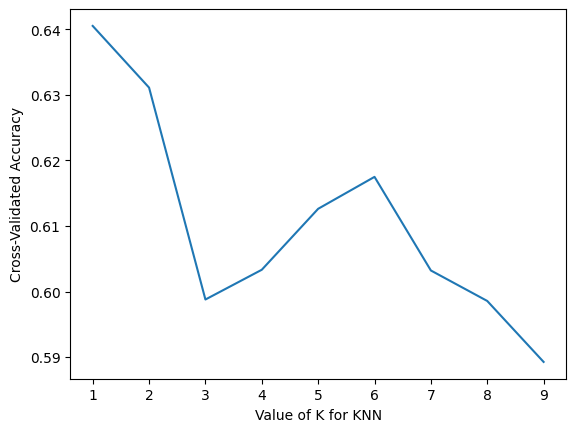

In [61]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

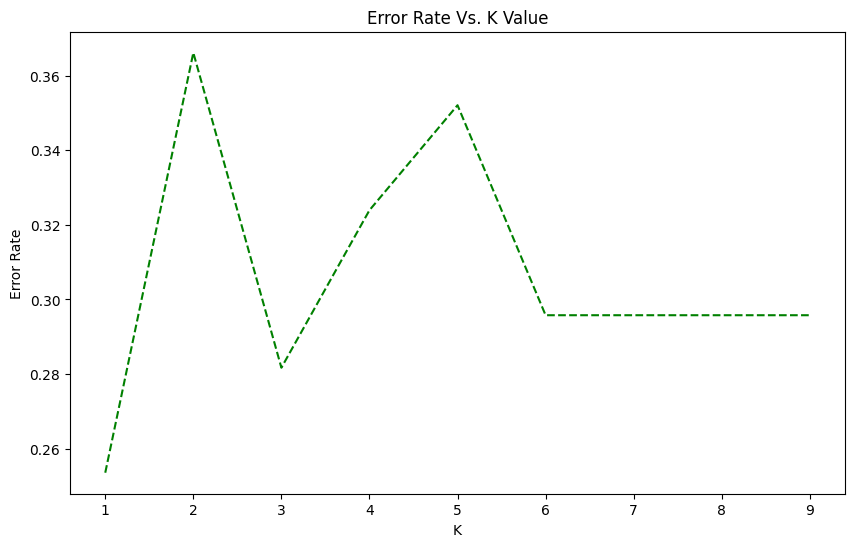

In [66]:
# plot Error Rate vs K Value
plt.figure(figsize=(10,6))

error_rate=[]
for i in range (1,10):

    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

plt.plot(range(1,10),error_rate, color='green',linestyle='dashed',
         markerfacecolor='red', markersize=12)

plt.title('Error Rate Vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')